## Importing Libraris

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.naive_bayes import GaussianNB

## Data Extraction

In [2]:
TRAIN_PATH = r'Datasets/train.csv'
TEST_PATH = r'Datasets/test.csv'
SAMPLE_SUBMISSION_PATH = r"Datasets/sample_submission.csv"

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
train_df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


## EDA

### Checking information of the datasets

In [4]:
print(train_df.shape)
print(test_df.shape)

(26570, 26)
(20775, 25)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [6]:
display(train_df.head())
display(test_df.head())

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


### Feature Groupping

In [7]:
# Mengelompokkan beberapa feature
measurement_cols = [i for i in train_df.columns if "measurement" in i]
measurement_int_cols = [i for i in measurement_cols if train_df[i].dtype == np.int64]
measurement_float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
attribute_cols = [i for i in train_df.columns if "attribute" in i]

### Missing Data

<Axes: xlabel='missing values', ylabel='column'>

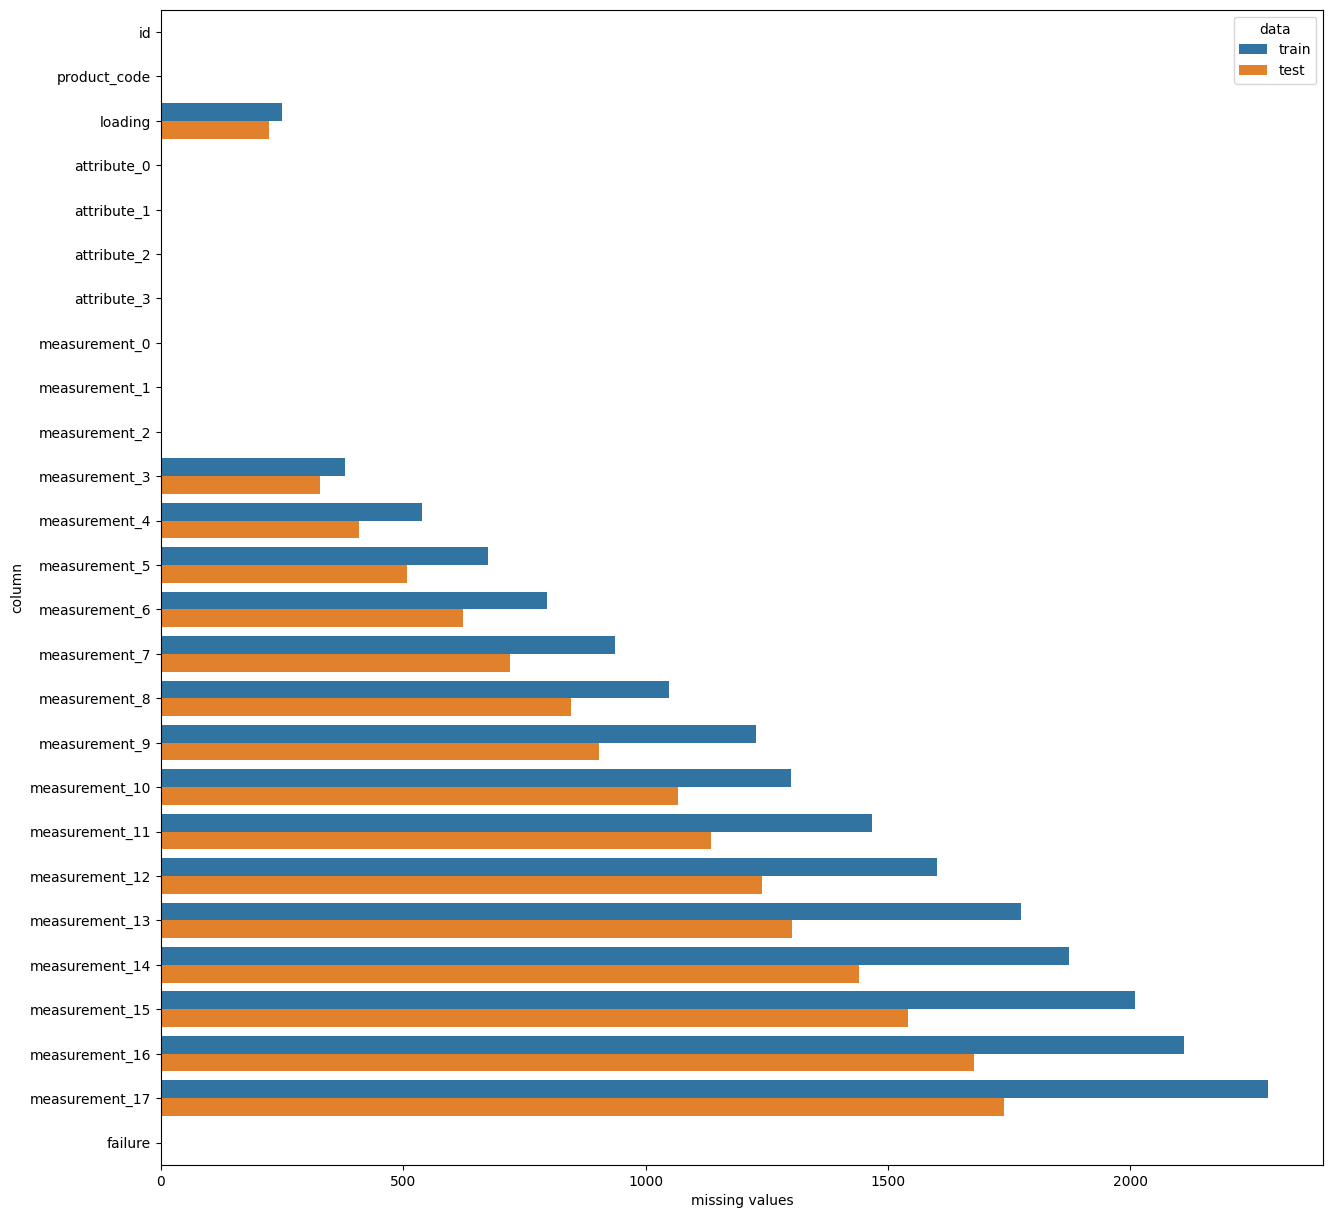

In [8]:
missing_values = pd.concat([train_df.isna().sum().rename("train"), test_df.isna().sum().rename("test")], axis=1)
#display(missing_values)
missing_values = pd.concat([train_df.isna().sum(), test_df.isna().sum()], axis=0).rename("missing values").reset_index().rename(columns={"index":"column"})
missing_values["data"] = ["train"]*len(train_df.columns) + ["test"]*len(test_df.columns)
f,ax = plt.subplots(figsize=(15,15))
sns.barplot(data = missing_values, y="column", x="missing values", hue="data", orient="h")

- Observasi:

1. Semua feature dengan value float mempunyai missing values

2. Train set dan test set mempunyai persentase yang sama dalam missing value

### Target - Failure of the product

In [9]:
value_count = train_df["failure"].value_counts()
value_count

failure
0    20921
1     5649
Name: count, dtype: int64

- Observasi
1. Persebaran kelas pada target(failure) tidak seimbang dimana kelas failure jauh lebih jarang terjadi dibandingkan dengan non failure.

### Categorical columns

#### Product code

In [10]:
value_count_product_code = train_df["product_code"].value_counts()
value_count_product_code

product_code
C    5765
E    5343
B    5250
D    5112
A    5100
Name: count, dtype: int64

In [11]:
value_count_product_code_test = test_df["product_code"].value_counts()
value_count_product_code_test

product_code
F    5422
I    5228
G    5107
H    5018
Name: count, dtype: int64

- Observasi
1. Product code dalam train set berbeda dengan test set
2. Jumlah kemunculan setiap product code kurang lebih sama 

#### Atribute 0

In [12]:
value_count_attribute0 = train_df["attribute_0"].value_counts()
value_count_attribute0

attribute_0
material_7    21320
material_5     5250
Name: count, dtype: int64

In [13]:
value_count_attribute0_test = test_df["attribute_0"].value_counts()
value_count_attribute0_test

attribute_0
material_5    10529
material_7    10246
Name: count, dtype: int64

- Observasi
1. attribute_0 mempunyai distribusi nilai yang berbeda dalam train dan test

#### Atribute 1

In [14]:
value_count_attribute1 = train_df["attribute_1"].value_counts()
value_count_attribute1

attribute_1
material_8    10865
material_5    10362
material_6     5343
Name: count, dtype: int64

In [15]:
value_count_attribute2 = train_df["attribute_2"].value_counts()
value_count_attribute2

attribute_2
6    10455
5     5765
8     5250
9     5100
Name: count, dtype: int64

- Observasi
1. Distribusinya berbeda pada train dan test

In [16]:
value_count_attribute3 = train_df["attribute_3"].value_counts()
value_count_attribute3

attribute_3
8    11015
9     5343
6     5112
5     5100
Name: count, dtype: int64

In [17]:
value_count_attribute3_test = test_df["attribute_3"].value_counts()
value_count_attribute3_test

attribute_3
4    5422
5    5228
7    5107
9    5018
Name: count, dtype: int64

- Observasi
1. Distribusinya berbeda pada train dan test

### Product code and attribute values

In [18]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].nunique()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,1,1,1,1
B,1,1,1,1
C,1,1,1,1
D,1,1,1,1
E,1,1,1,1
F,1,1,1,1
G,1,1,1,1
H,1,1,1,1
I,1,1,1,1


In [19]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].first()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,material_7,material_8,9,5
B,material_5,material_5,8,8
C,material_7,material_8,5,8
D,material_7,material_5,6,6
E,material_7,material_6,6,9
F,material_5,material_6,6,4
G,material_5,material_6,9,7
H,material_7,material_7,7,9
I,material_7,material_5,9,5


### Distribution of float value

C:\Users\Hakim\AppData\Local\Temp\ipykernel_8264\2480247354.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,3,i+1)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: F

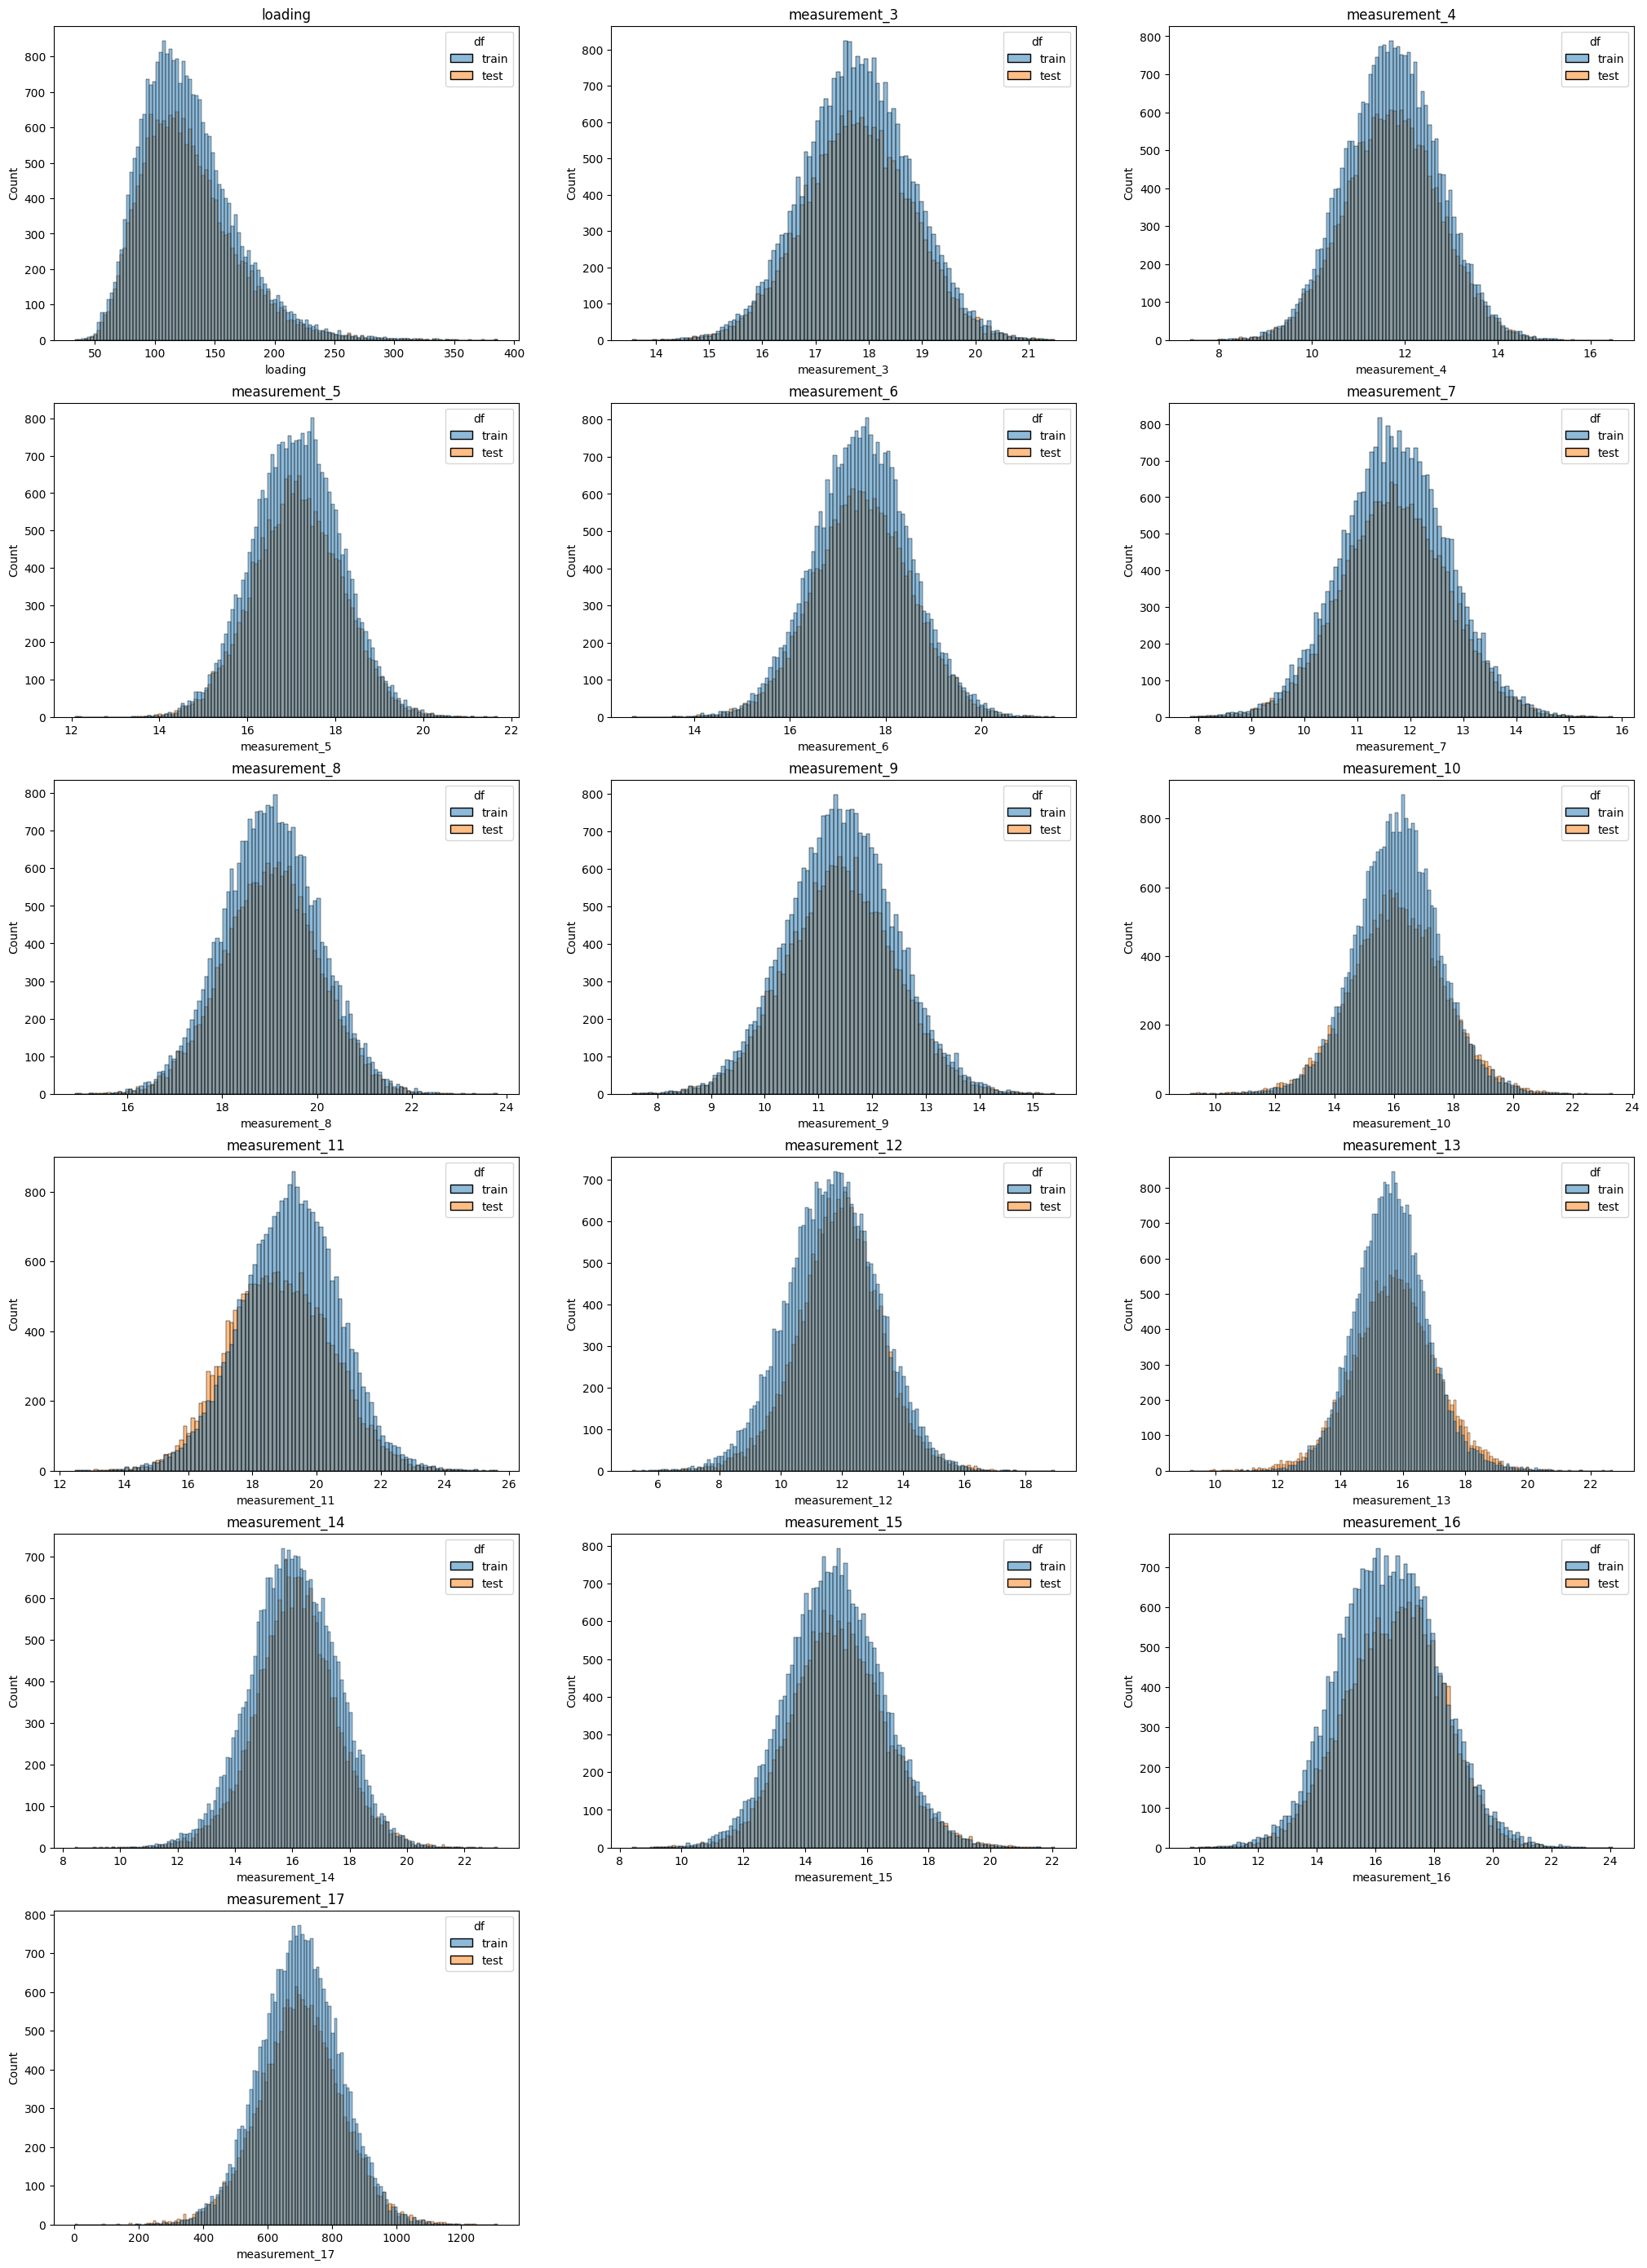

In [20]:
plt.subplots(figsize=(25,35))
train_df["df"] = "train"
test_df["df"] = "test"
for i, column in enumerate(float_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=pd.concat([train_df, test_df]).reset_index(drop=True), x=column,hue="df")
    plt.title(column)

- Observasi 
1. Semua feature measurement float terdistribusi dengan normal
2. Feature loading mempunyai distribusi skewed

### Distribution of integer value

C:\Users\Hakim\AppData\Local\Temp\ipykernel_8264\2506790809.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3,i+1)


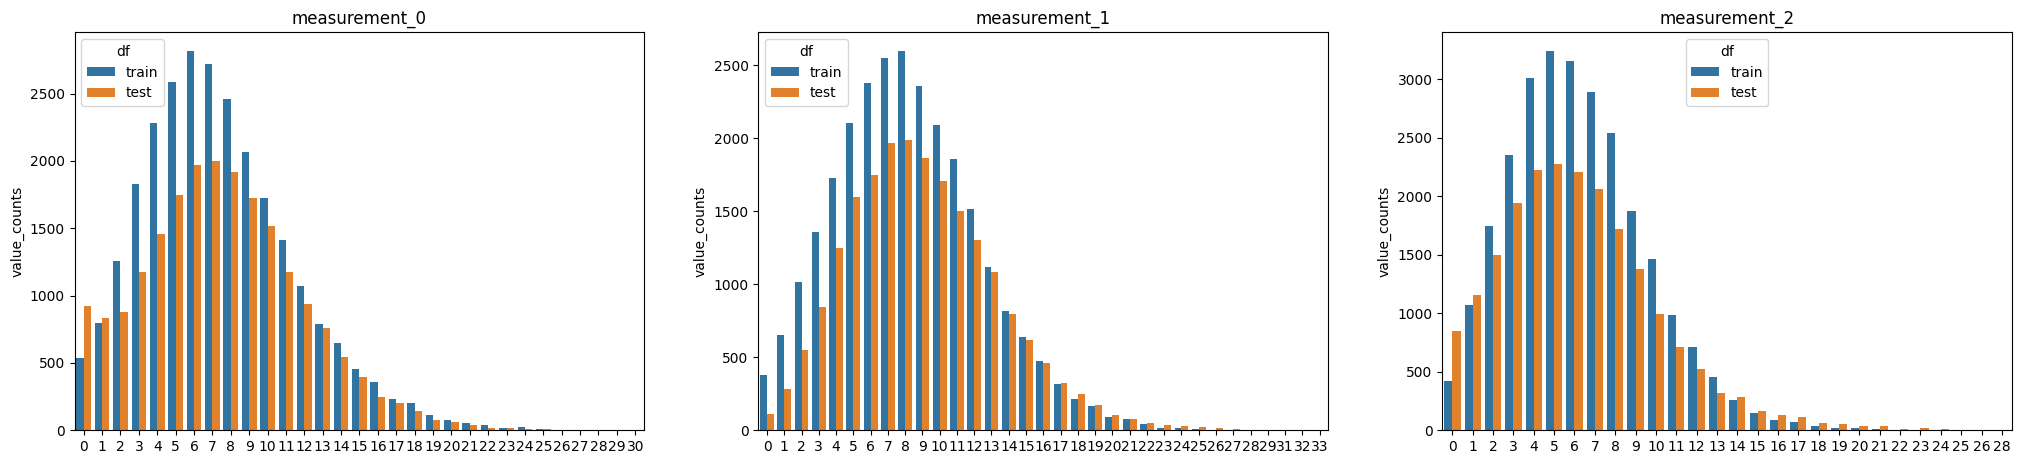

In [21]:
plt.subplots(figsize=(25,30))
for i, column in enumerate(measurement_int_cols):
    val_count = pd.concat([train_df, test_df])[[column,"df"]].value_counts().rename("value_counts").reset_index()
    plt.subplot(5,3,i+1)
    ax = sns.barplot(data = val_count, x=column, y="value_counts", hue="df")
    ax.set_xlabel(None)
    plt.title(column)

- Observasi 
1. Distribusi pada train set dan test set untuk ketiga feature berbeda

### Correlations

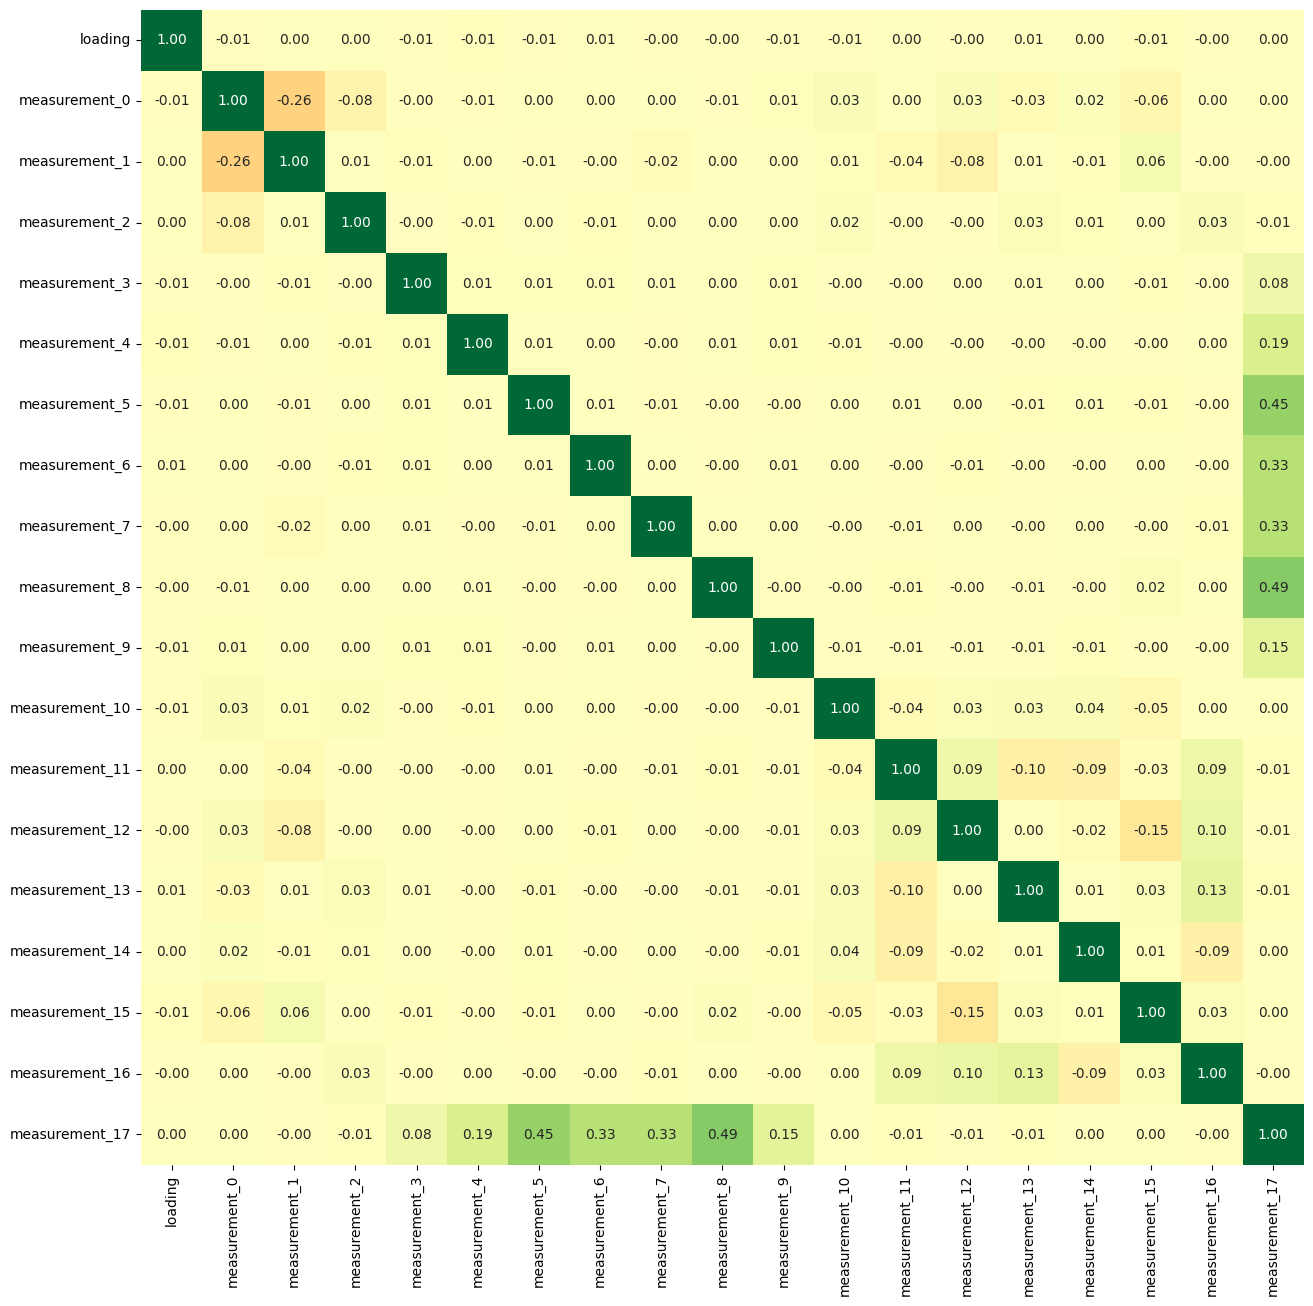

In [22]:
plt.subplots(figsize=(15,15))
sns.heatmap(train_df[["loading"] + measurement_cols].corr(),annot=True, cmap="RdYlGn", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);

- Observasi
1. Terdapat beberapa korelasi di antara feature measurement, khususnya measurement 17.

## Data Preparation

#### Dropping id, df, and failure columns

In [23]:
train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

In [24]:
train_df = train_df.drop(columns=["df"])
test_df = test_df.drop(columns=["df"])

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [26]:
X = train_df.drop(columns="failure")
y = train_df["failure"]

X_test = test_df

## Data Preprocessing

In [27]:
def _scale(train_data, val_data):
    scaler = PowerTransformer()
    
    scaled_train = scaler.fit_transform(train_data[measurement_cols + ["loading"]])
    scaled_val = scaler.transform(val_data[measurement_cols + ["loading"]])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = scaled_train
    new_val[measurement_cols + ["loading"]] = scaled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [28]:
def _impute(train_data, val_data, strategy="mean", fill_value=None):

    if strategy == "constant":
        imputer = SimpleImputer(strategy=strategy, fill_value=fill_value)
    else:
        imputer = SimpleImputer(strategy=strategy)
    
    imputer.fit(train_data[measurement_cols + ["loading"]])
    
    filled_train = imputer.transform(train_data[measurement_cols + ["loading"]])
    filled_val = imputer.transform(val_data[measurement_cols + ["loading"]])
    
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = filled_train
    new_val[measurement_cols + ["loading"]] = filled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(new_val)
    
    return new_train, new_val


In [29]:
def _encode(train_data, val_data, encoding_strategy="onehot", columns=None):

    if columns is None:
        columns = ["product_code", "attribute_0", "attribute_1", "attribute_2", "attribute_3"]
    
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    if encoding_strategy == "onehot":
        new_train = pd.get_dummies(new_train, columns=columns)
        new_val = pd.get_dummies(new_val, columns=columns)
        
        train_val = pd.concat([new_train, new_val]).fillna(0)
        new_train = train_val.iloc[0:len(train_data)]
        new_val = train_val.iloc[len(train_data):]
    
    elif encoding_strategy == "label":
        label_encoders = {}
        for col in columns:
            label_encoders[col] = LabelEncoder()
            new_train[col] = label_encoders[col].fit_transform(new_train[col])
            new_val[col] = label_encoders[col].transform(new_val[col])
    
    else:
        raise ValueError("Unsupported encoding strategy. Use 'onehot' or 'label'.")
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(new_val)
    
    return new_train, new_val


# Testing

## With one hot encoding + Simple Imputer + Scaling

In [30]:
def k_fold_cv(model,X,y):
    kfold = GroupKFold(n_splits=5)

    feature_imp, y_pred_list, y_true_list, roc_list  = [],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y, train_df["product_code"])):
        print("===== fold", fold, "=====")
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]
            
        #impute
        X_train, X_val = _impute(X_train, X_val)
            
        #scale the data
        X_train, X_val = _scale(X_train, X_val)
            
        #encode categorical variables
        X_train, X_val = _encode(X_train, X_val)
            
        # fit the model
        model.fit(X_train,y_train)
            
        #make predictions
        y_pred = model.predict_proba(X_val)[:,1]
            
        #save predictions for later
        y_pred_list = np.append(y_pred_list, y_pred)
        y_true_list = np.append(y_true_list, y_val)
        
        #evaluate performance
        roc_list.append(roc_auc_score(y_val,y_pred))
        print("roc auc", roc_auc_score(y_val,y_pred))
            
        #feature imporance
        try:
            feature_imp.append(model.feature_importances_)
        except AttributeError: # if model does not have .feature_importances_ attribute
            pass # returns empty list
    return feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val

In [31]:
models = {
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [38]:
%%time
results = {}

for model_name, model in models.items():
    print(model_name)
    feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val = k_fold_cv(model=model, X=X, y=y)
    print("\n")
    results[model_name] = {
        'feature_imp': feature_imp,
        'y_pred_list': y_pred_list,
        'y_true_list': y_true_list,
        'roc_list': roc_list,
        'X_val': X_val,
        'y_val': y_val,
        'roc_auc_mean': np.mean(roc_list)
    }

KNN
===== fold 0 =====
roc auc 0.5107939728399069
===== fold 1 =====
roc auc 0.5196472691065235
===== fold 2 =====
roc auc 0.5329148000949212
===== fold 3 =====
roc auc 0.5041472571942447
===== fold 4 =====
roc auc 0.5154446988682726
GaussianNB
===== fold 0 =====
roc auc 0.580254738588613
===== fold 1 =====
roc auc 0.5778840158237452
===== fold 2 =====
roc auc 0.590481593625065
===== fold 3 =====
roc auc 0.5887410071942446
===== fold 4 =====
roc auc 0.586055557611088
Decision Tree
===== fold 0 =====
roc auc 0.5088198164078703
===== fold 1 =====
roc auc 0.5094436295085787
===== fold 2 =====
roc auc 0.5095765772946379
===== fold 3 =====
roc auc 0.5086528776978417
===== fold 4 =====
roc auc 0.5036915294379851
CPU times: total: 14.8 s
Wall time: 25.4 s


In [39]:
best_model_name = max(results, key=lambda model: results[model]['roc_auc_mean'])
best_model_roc_auc = results[best_model_name]['roc_auc_mean']

for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print(f"ROC AUC: {np.mean(result['roc_list'])}")
    print(f"Predictions: {result['y_pred_list']}")
    print(f"True Values: {result['y_true_list']}")
    print(f"Feature Importances: {result['feature_imp']}")
    print("\n")

print(f"The best model is {best_model_name} with a ROC AUC score of {best_model_roc_auc}")

Results for KNN:
ROC AUC: 0.5165895996207738
Predictions: [0.2 0.2 0.  ... 0.2 0.4 0.2]
True Values: [0. 0. 0. ... 0. 0. 0.]
Feature Importances: []


Results for GaussianNB:
ROC AUC: 0.5846833825685511
Predictions: [0.18945594 0.23646829 0.21051546 ... 0.1801857  0.18709529 0.34877766]
True Values: [0. 0. 0. ... 0. 0. 0.]
Feature Importances: []


Results for Decision Tree:
ROC AUC: 0.5080368860693827
Predictions: [0. 0. 0. ... 0. 0. 1.]
True Values: [0. 0. 0. ... 0. 0. 0.]
Feature Importances: [array([0.08149041, 0.03639119, 0.02964149, 0.02952061, 0.05434884,
       0.05892821, 0.05668744, 0.05166617, 0.05129375, 0.05570156,
       0.05496274, 0.05562362, 0.04787659, 0.05377517, 0.05119799,
       0.04998335, 0.05369418, 0.05222773, 0.04856319, 0.00029217,
       0.00086328, 0.00396219, 0.00134645, 0.00317534, 0.00070565,
       0.00191074, 0.00336977, 0.00071872, 0.00102394, 0.00183208,
       0.00112202, 0.00125813, 0.00301388, 0.00040637, 0.00142503,
       0.        , 0.        

C:\Users\Hakim\AppData\Local\Temp\ipykernel_30716\295709112.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Hakim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: Fut

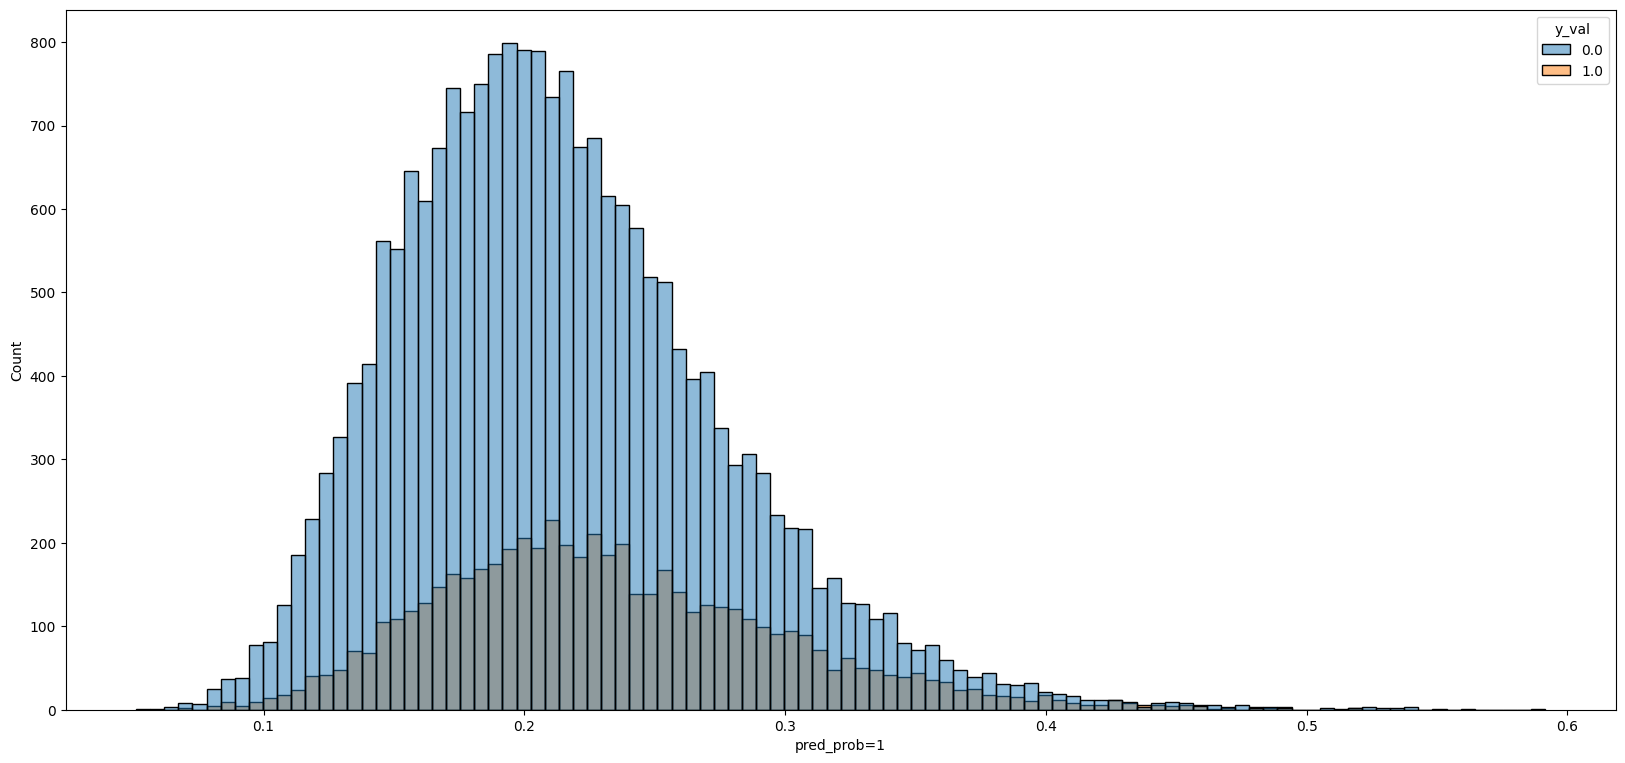

In [39]:
val_preds = pd.DataFrame({"pred_prob=1":y_pred_list, "y_val":y_true_list})
f,ax = plt.subplots(figsize=(20,20))
plt.subplot(2,1,1)
ax = sns.histplot(data=val_preds, x="pred_prob=1", hue="y_val", bins = 100)

# Inference

In [40]:
def inference(X, X_test, iterations):
    pred_list = []
    for i in range(iterations):
        X_train = X.sample(int(0.8*len(X)))
        y_train = y.loc[X_train.index]

        #impute the data
        X_train, X_te = _impute(X_train, X_test)

        #scale the data
        X_train, X_te = _scale(X_train, X_te)

        #encode categorical variables
        X_train, X_te = _encode(X_train, X_te)
        
        model = GaussianNB()
        # fit the model
        model.fit(X_train,y_train)

        #make predictions
        y_pred = model.predict_proba(X_te)[:,1]
        
        pred_list.append(y_pred)
    
    pred_df = pd.DataFrame(pred_list).T
    pred_df = pred_df.rank()
    pred_df["mean"] = pred_df.mean(axis=1)
    
    return pred_df

In [ ]:
%%time
predictions_df = inference(X, X_test, 500)

CPU times: user 1min 51s, sys: 5.7 s, total: 1min 56s
Wall time: 1min 58s


In [44]:
pred_df = pd.DataFrame(y_pred_list, columns=["pred_prob"])
pred_df["rank"] = pred_df.rank()

print("roc auc using prediction probabilities:", roc_auc_score(y_true_list, pred_df["pred_prob"]))
print("roc auc using predicted probabilities ranks:", roc_auc_score(y_true_list, pred_df["rank"]))

roc auc using prediction probabilities: 0.5824259524418327
roc auc using predicted probabilities ranks: 0.5824259524418327


# Submission

In [ ]:
sub_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)
sub_df["failure"] = predictions_df["mean"]
sub_df.to_csv('../submissions/submission_7.csv', index=False)